In [67]:
#Imported libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Merging the tables

In [2]:
sales = pd.read_csv('/content/sales.csv')

In [3]:
sales.head()

,Sale_ID,Date,Store_ID,Product_ID,Units
0,1,2022-01-01,24.0,4.0,1.0
1,2,2022-01-01,28.0,1.0,1.0
2,3,2022-01-01,6.0,8.0,1.0
3,4,2022-01-01,48.0,7.0,1.0
4,5,2022-01-01,44.0,18.0,1.0


In [4]:
products = pd.read_csv('/content/products.csv')
products.head()

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,Action Figure,Toys,$9.99,$15.99
1,2,Animal Figures,Toys,$9.99,$12.99
2,3,Barrel O' Slime,Art & Crafts,$1.99,$3.99
3,4,Chutes & Ladders,Games,$9.99,$12.99
4,5,Classic Dominoes,Games,$7.99,$9.99


In [5]:
stores = pd.read_csv('/content/stores.csv')
stores.head(10)

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
1,2,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27
2,3,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
3,4,Maven Toys Saltillo 1,Saltillo,Downtown,2000-01-01
4,5,Maven Toys La Paz 1,La Paz,Downtown,2001-05-31
5,6,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13
6,7,Maven Toys Monterrey 2,Monterrey,Downtown,2003-12-25
7,8,Maven Toys Pachuca 1,Pachuca,Downtown,2004-10-14
8,9,Maven Toys Ciudad de Mexico 1,Cuidad de Mexico,Downtown,2004-10-15
9,10,Maven Toys Campeche 1,Campeche,Downtown,2005-01-14


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719312 entries, 0 to 719311
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sale_ID     719312 non-null  int64  
 1   Date        719311 non-null  object 
 2   Store_ID    719311 non-null  float64
 3   Product_ID  719311 non-null  float64
 4   Units       719311 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 27.4+ MB


In [7]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_ID        35 non-null     int64 
 1   Product_Name      35 non-null     object
 2   Product_Category  35 non-null     object
 3   Product_Cost      35 non-null     object
 4   Product_Price     35 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.5+ KB


In [8]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store_ID         50 non-null     int64 
 1   Store_Name       50 non-null     object
 2   Store_City       50 non-null     object
 3   Store_Location   50 non-null     object
 4   Store_Open_Date  50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [9]:
df1 = pd.merge(sales, products, on='Product_ID')
df1.head()

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,2022-01-01,24.0,4.0,1.0,Chutes & Ladders,Games,$9.99,$12.99
1,2,2022-01-01,28.0,1.0,1.0,Action Figure,Toys,$9.99,$15.99
2,3,2022-01-01,6.0,8.0,1.0,Deck Of Cards,Games,$3.99,$6.99
3,4,2022-01-01,48.0,7.0,1.0,Dart Gun,Sports & Outdoors,$11.99,$15.99
4,5,2022-01-01,44.0,18.0,1.0,Lego Bricks,Toys,$34.99,$39.99


In [10]:
df = pd.merge(df1, stores, on='Store_ID')
df.head()

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,2022-01-01,24.0,4.0,1.0,Chutes & Ladders,Games,$9.99,$12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
1,2,2022-01-01,28.0,1.0,1.0,Action Figure,Toys,$9.99,$15.99,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
2,3,2022-01-01,6.0,8.0,1.0,Deck Of Cards,Games,$3.99,$6.99,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13
3,4,2022-01-01,48.0,7.0,1.0,Dart Gun,Sports & Outdoors,$11.99,$15.99,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23
4,5,2022-01-01,44.0,18.0,1.0,Lego Bricks,Toys,$34.99,$39.99,Maven Toys Puebla 3,Puebla,Residential,2014-12-27


# Data Cleaning

In [11]:
df.columns

Index(['Sale_ID', 'Date', 'Store_ID', 'Product_ID', 'Units', 'Product_Name',
       'Product_Category', 'Product_Cost', 'Product_Price', 'Store_Name',
       'Store_City', 'Store_Location', 'Store_Open_Date'],
      dtype='object')

In [12]:
df.rename(columns = {
    'Sale_ID' : 'sale_id',
    'Date' : 'date',
    'Store_ID' : 'store_id',
    'Product_ID' : 'product_id',
    'Units' : 'units',
    'Product_Name' : 'product_name',
    'Product_Category' : 'product_category',
    'Product_Cost' : 'product_cost',
    'Product_Price' : 'product_price',
    'Store_Name' : 'store_name',
    'Store_city' : 'store_city',
    'Store_Location' : 'store_location',
    'Store_Open_Date' : 'store_open_date',
}, inplace = True)

In [13]:
df.isnull().sum()

,0
sale_id,0
date,0
store_id,0
product_id,0
units,0
product_name,0
product_category,0
product_cost,0
product_price,0
store_name,0


In [14]:
df.duplicated().sum()

0

In [15]:
df.dtypes

,0
sale_id,int64
date,object
store_id,float64
product_id,float64
units,float64
product_name,object
product_category,object
product_cost,object
product_price,object
store_name,object


In [16]:
df['date'] = pd.to_datetime(df['date'])
df['store_open_date'] = pd.to_datetime(df['store_open_date'])
df['product_cost'] = df['product_cost'].str.replace('$', '').astype(float)
df['product_price'] = df['product_price'].str.replace('$', '').astype(float)

# Feature Engineering

In [68]:
#Added new columns
df['revenue'] = df['product_price'] * df['units']
df['profit'] = (df['product_price'] - df['product_cost']) * df['units']
df['profit_margin'] = df['profit'] / df['revenue']

In [18]:
df['date'].max()

Timestamp('2023-07-14 00:00:00')

In [19]:
latest_date = pd.to_datetime("2023-09-30")
df['store_age'] = (latest_date - df['store_open_date']).dt.days // 365

In [20]:
df.head(5)

,sale_id,date,store_id,product_id,units,product_name,product_category,product_cost,product_price,store_name,Store_City,store_location,store_open_date,revenue,profit,profit_margin,store_age
0,1,2022-01-01,24.0,4.0,1.0,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,12.99,3.0,0.230947,13
1,2,2022-01-01,28.0,1.0,1.0,Action Figure,Toys,9.99,15.99,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,15.99,6.0,0.375235,12
2,3,2022-01-01,6.0,8.0,1.0,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13,6.99,3.0,0.429185,19
3,4,2022-01-01,48.0,7.0,1.0,Dart Gun,Sports & Outdoors,11.99,15.99,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23,15.99,4.0,0.250156,7
4,5,2022-01-01,44.0,18.0,1.0,Lego Bricks,Toys,34.99,39.99,Maven Toys Puebla 3,Puebla,Residential,2014-12-27,39.99,5.0,0.125031,8


# Exploratory Data Analysis

In [21]:
df.head(2)

,sale_id,date,store_id,product_id,units,product_name,product_category,product_cost,product_price,store_name,Store_City,store_location,store_open_date,revenue,profit,profit_margin,store_age
0,1,2022-01-01,24.0,4.0,1.0,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,12.99,3.0,0.230947,13
1,2,2022-01-01,28.0,1.0,1.0,Action Figure,Toys,9.99,15.99,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,15.99,6.0,0.375235,12


<Axes: xlabel='store_age', ylabel='count'>

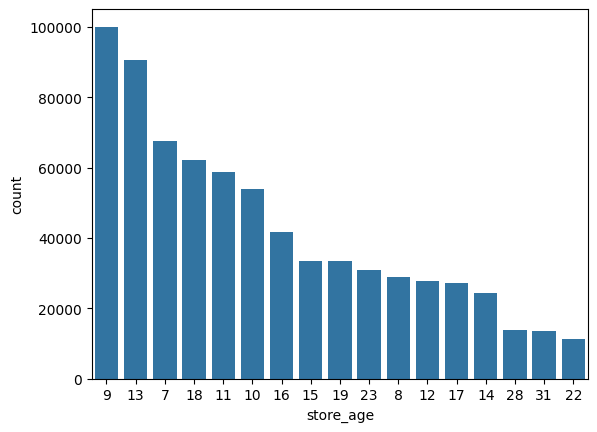

In [69]:
#Plotting the store age
sns.countplot(x = 'store_age', data = df, order = df['store_age'].value_counts().index)

Text(0.5, 1.0, 'Product category distribution')

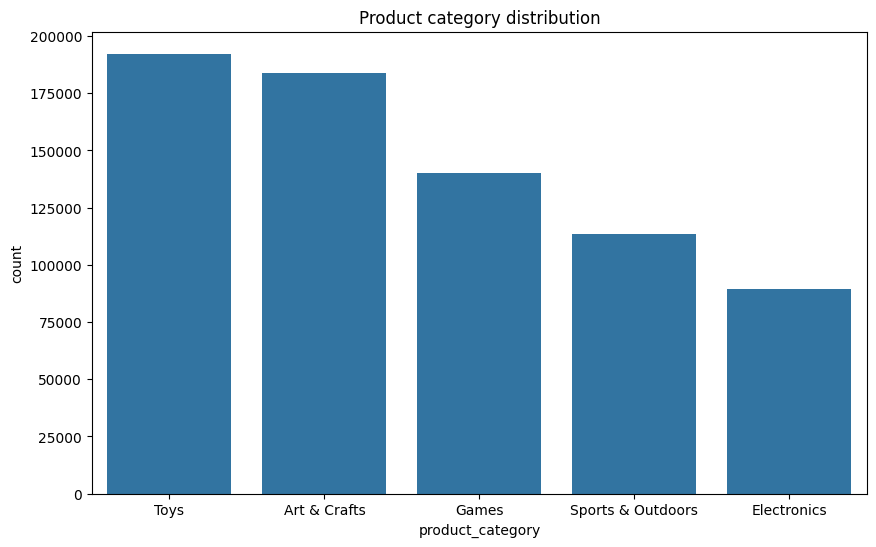

In [70]:
#Plotting the product category distribution
plt.figure(figsize=(10, 6))
sns.countplot(x = 'product_category', data = df, order = df['product_category'].value_counts().index)
plt.title('Product category distribution')

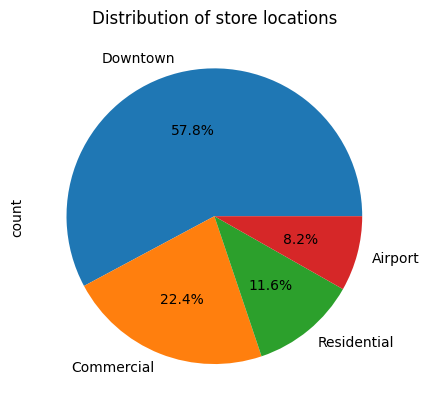

In [71]:
#Plotted the store location distribution
df['store_location'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=False)
plt.title('Distribution of store locations')
plt.show()

In [25]:
df.describe()

,sale_id,date,store_id,product_id,units,product_cost,product_price,store_open_date,revenue,profit,profit_margin,store_age
count,719311.000000,719311,719311.000000,719311.000000,719311.000000,719311.000000,719311.000000,719311,719311.000000,719311.000000,719311.000000,719311.000000
mean,359656.000000,2022-11-02 03:51:18.200667392,25.246365,14.903548,1.322073,9.995386,13.830543,2009-08-18 14:47:07.735986432,17.590273,4.921179,0.313593,13.616697
min,1.000000,2022-01-01 00:00:00,1.000000,1.000000,1.000000,1.990000,2.990000,1992-09-18 00:00:00,2.990000,1.000000,0.090992,7.000000
25%,179828.500000,2022-06-15 00:00:00,13.000000,6.000000,1.000000,3.990000,6.990000,2006-08-30 00:00:00,8.990000,2.000000,0.192382,9.000000
50%,359656.000000,2022-11-20 00:00:00,26.000000,14.000000,1.000000,7.990000,12.990000,2010-09-15 00:00:00,14.990000,4.000000,0.300300,13.000000
75%,539483.500000,2023-03-24 00:00:00,37.000000,24.000000,1.000000,11.990000,15.990000,2013-11-28 00:00:00,19.990000,6.000000,0.429185,17.000000
max,719311.000000,2023-07-14 00:00:00,50.000000,35.000000,30.000000,34.990000,39.990000,2016-05-18 00:00:00,879.780000,150.000000,0.700701,31.000000
std,207647.344077,NaN,14.361851,9.912361,0.846303,7.829303,8.673000,NaN,15.830251,4.587419,0.154102,5.337793


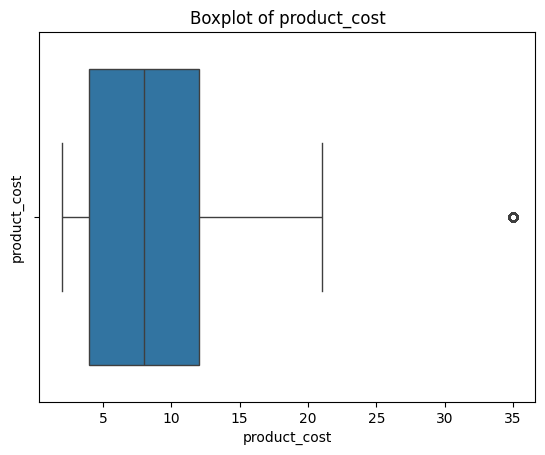

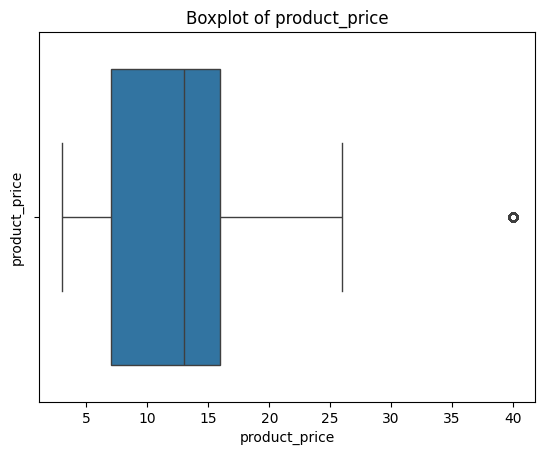

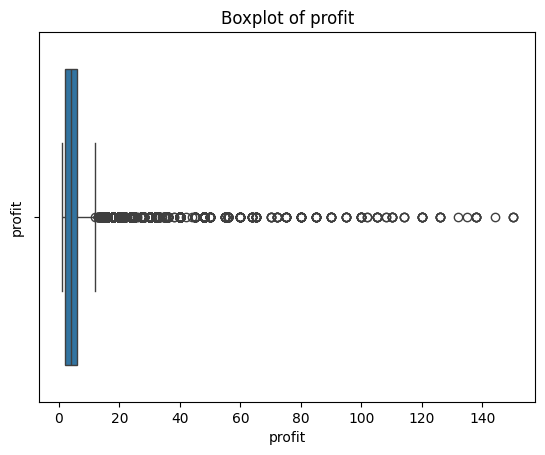

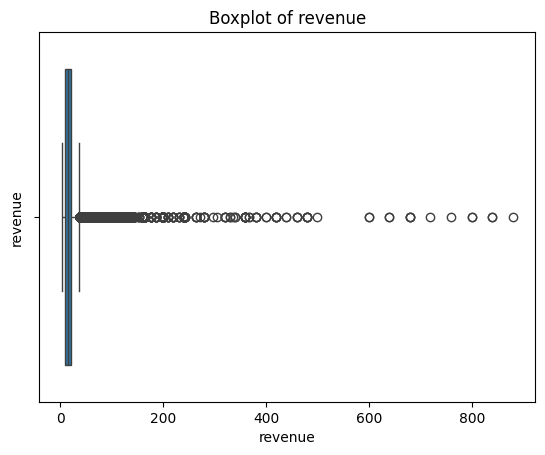

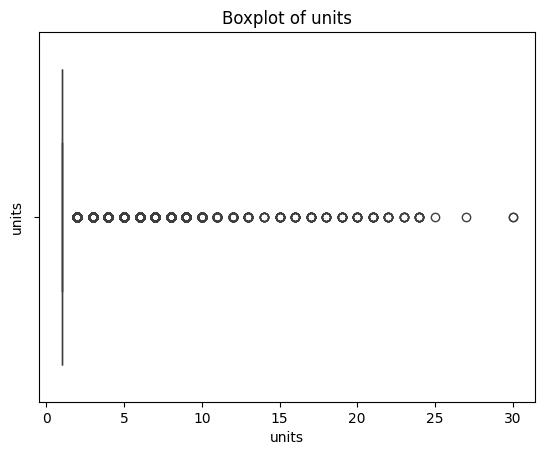

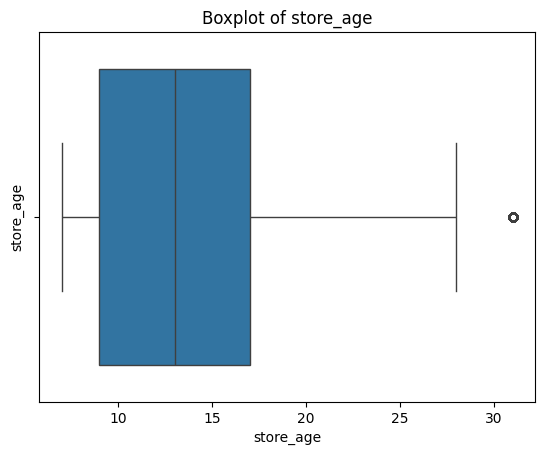

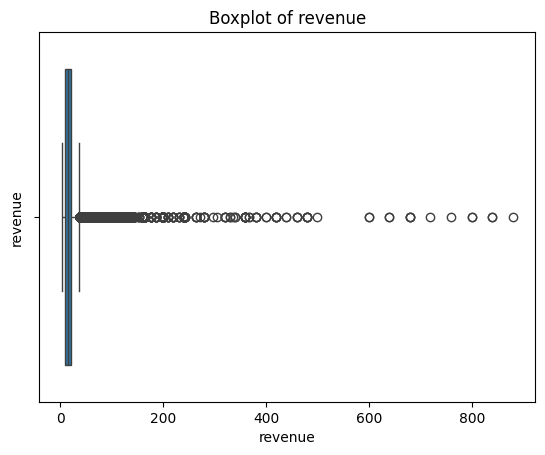

In [74]:
#Created a variable that will hold the numeric columns then plot the boxplots for them all
ol = ['product_cost', 'product_price', 'profit', 'revenue', 'units', 'store_age', 'revenue']
for i in ol:
  sns.boxplot(x=df[i])
  plt.title(f'Boxplot of {i}')
  plt.ylabel(i)
  plt.show()

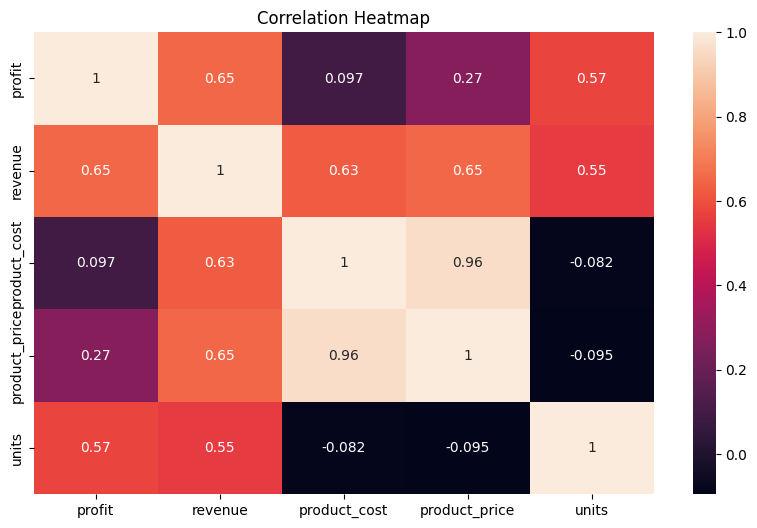

In [77]:
#Plot the correlation map
correlation_matrix = df[ol].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-78-65246a0fd5f2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


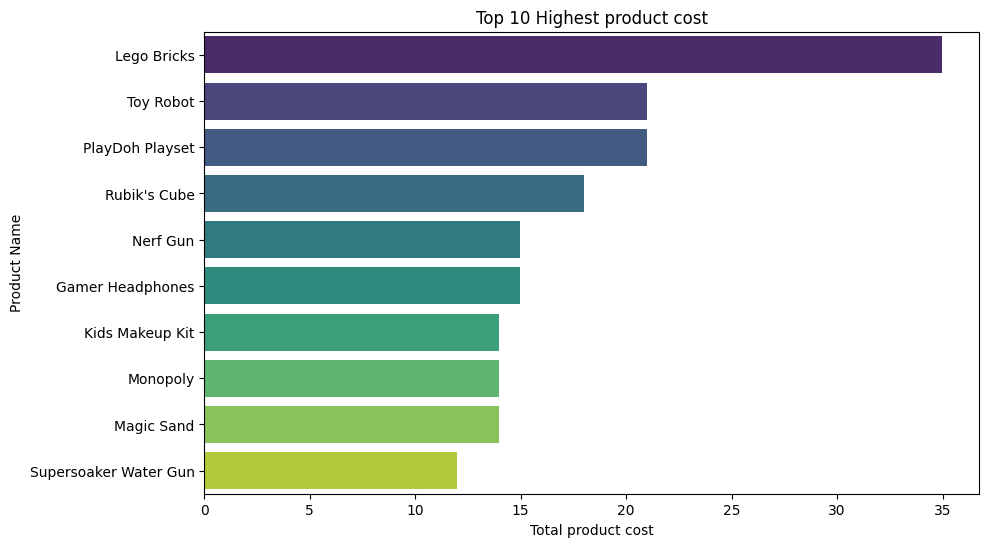

In [78]:
#Used group by to find the highest product cost
Highest_product_cost = df.groupby('product_name')['product_cost'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=Highest_product_cost.values,
    y=Highest_product_cost.index,
    palette="viridis")

plt.title('Top 10 Highest product cost')
plt.xlabel('Total product cost')
plt.ylabel('Product Name')
plt.show()

<ipython-input-79-76d200995d3a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


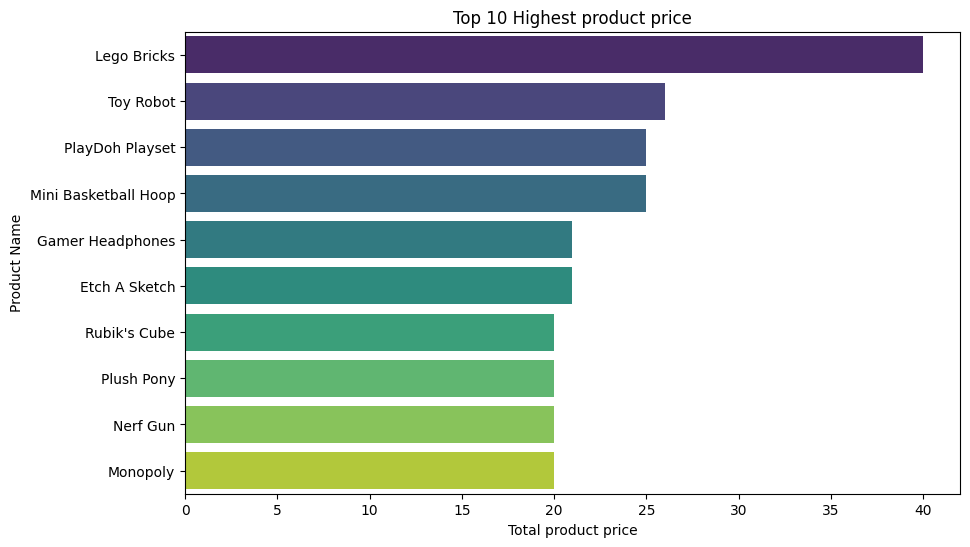

In [79]:
#Used group by to find the highest product costs
Highest_product_price = df.groupby('product_name')['product_price'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=Highest_product_price.values,
    y=Highest_product_price.index,
    palette="viridis")

plt.title('Top 10 Highest product price')
plt.xlabel('Total product price')
plt.ylabel('Product Name')
plt.show()

<ipython-input-80-3f2c654053aa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


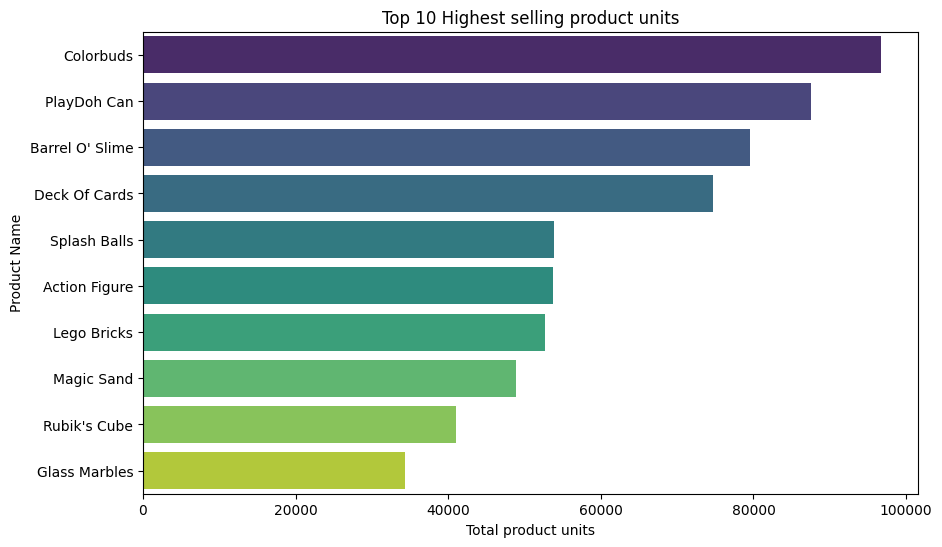

In [80]:
#Used group by to find the highest selling products by units
Highest_selling_product_units = df.groupby('product_name')['units'].sum().sort_values(ascending=False).head(10)
Highest_selling_product_units

plt.figure(figsize=(10, 6))
sns.barplot(
    x=Highest_selling_product_units.values,
    y=Highest_selling_product_units.index,
    palette="viridis")

plt.title('Top 10 Highest selling product units')
plt.xlabel('Total product units')
plt.ylabel('Product Name')
plt.show()

<ipython-input-81-0f4e1f713863>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


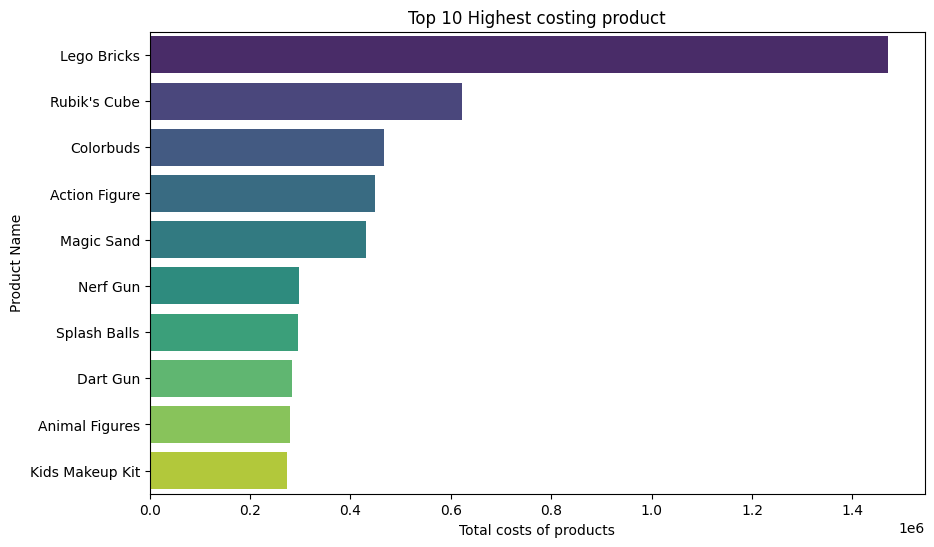

In [81]:
#Used group by to find the highest costing products
Total_product_cost = df.groupby('product_name')['product_cost'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=Total_product_cost.values,
    y=Total_product_cost.index,
    palette="viridis")

plt.title('Top 10 Highest costing product')
plt.xlabel('Total costs of products')
plt.ylabel('Product Name')
plt.show()

<ipython-input-82-9c12bea72b40>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


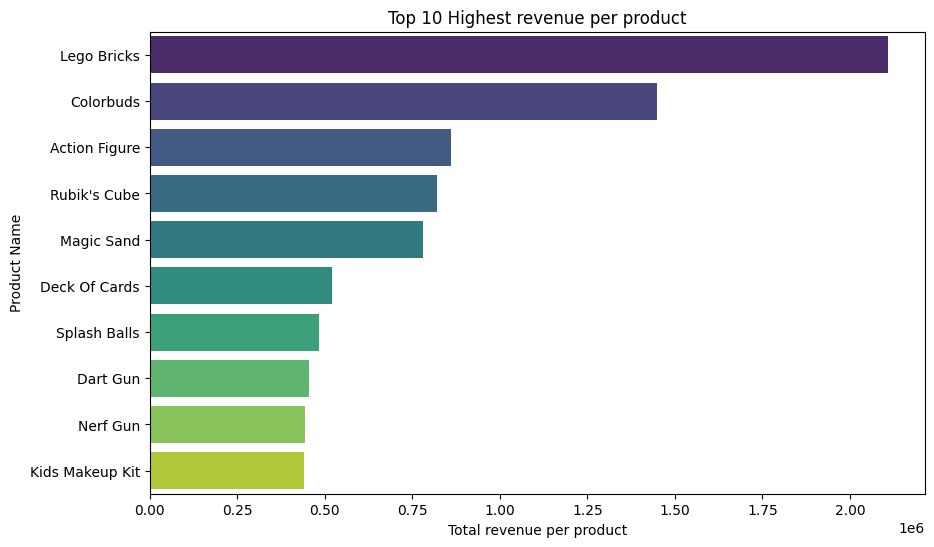

In [82]:
#Used group by to find the highest revenue per product
Highest_revenue_per_product = df.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=Highest_revenue_per_product.values,
    y=Highest_revenue_per_product.index,
    palette="viridis")

plt.title('Top 10 Highest revenue per product')
plt.xlabel('Total revenue per product')
plt.ylabel('Product Name')
plt.show()

<ipython-input-83-1c40433ca878>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


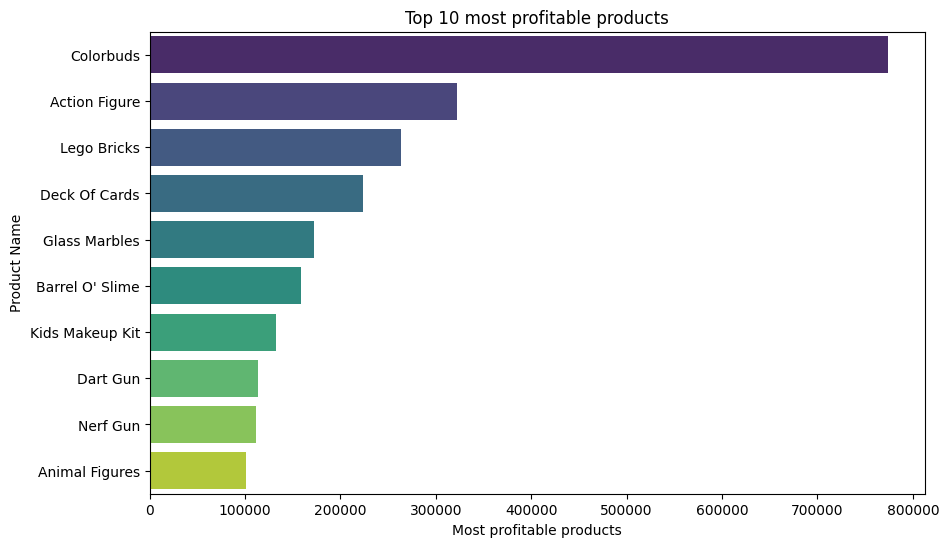

In [83]:
#Used group by to find the most profitable products
Most_profitable = df.groupby('product_name')['profit'].sum().sort_values(ascending = False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=Most_profitable.values,
    y=Most_profitable.index,
    palette="viridis")

plt.title('Top 10 most profitable products')
plt.xlabel('Most profitable products')
plt.ylabel('Product Name')
plt.show()

<ipython-input-84-14725f41b1a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


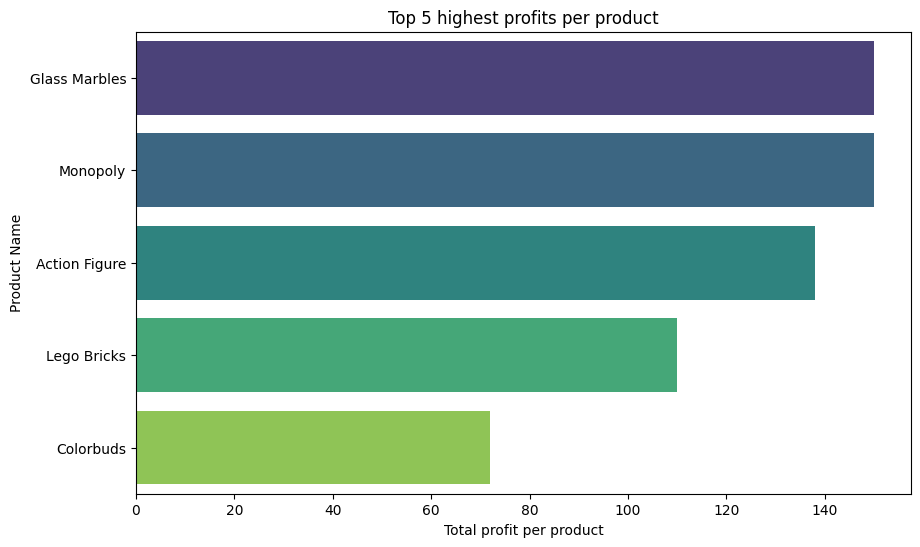

In [84]:
#Used group by to find the highest profits per product
Highest_profit_per_product = df.groupby('product_name')['profit'].max().sort_values(ascending=False).head()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=Highest_profit_per_product.values,
    y=Highest_profit_per_product.index,
    palette="viridis")

plt.title('Top 5 highest profits per product')
plt.xlabel('Total profit per product')
plt.ylabel('Product Name')
plt.show()

<ipython-input-85-e65c2827ad77>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


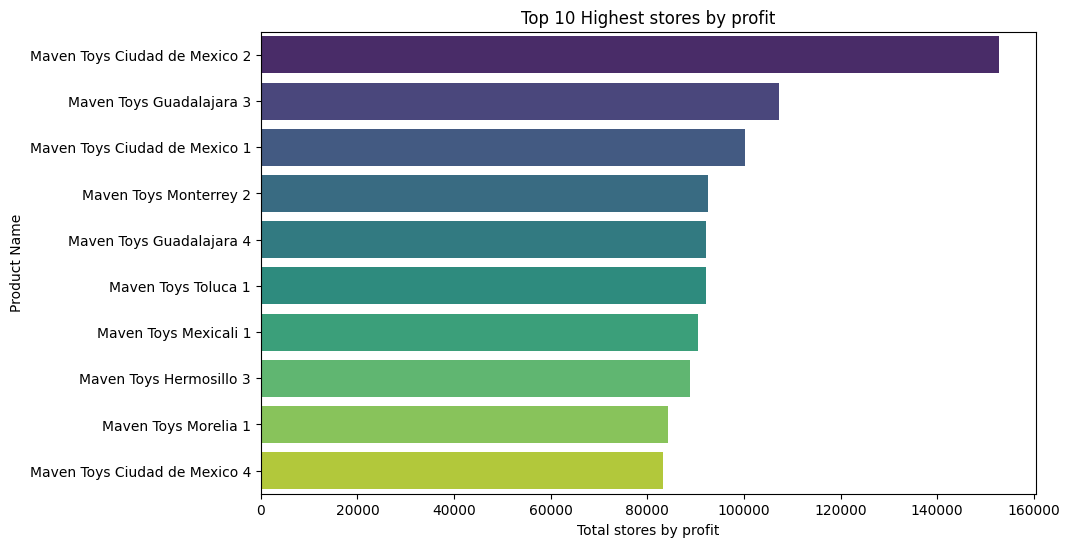

In [85]:
#Used group by to find the stores with the highest profits
Highest_profit_store = df.groupby('store_name')['profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=Highest_profit_store.values,
    y=Highest_profit_store.index,
    palette="viridis")

plt.title('Top 10 Highest stores by profit')
plt.xlabel('Total stores by profit')
plt.ylabel('Product Name')
plt.show()

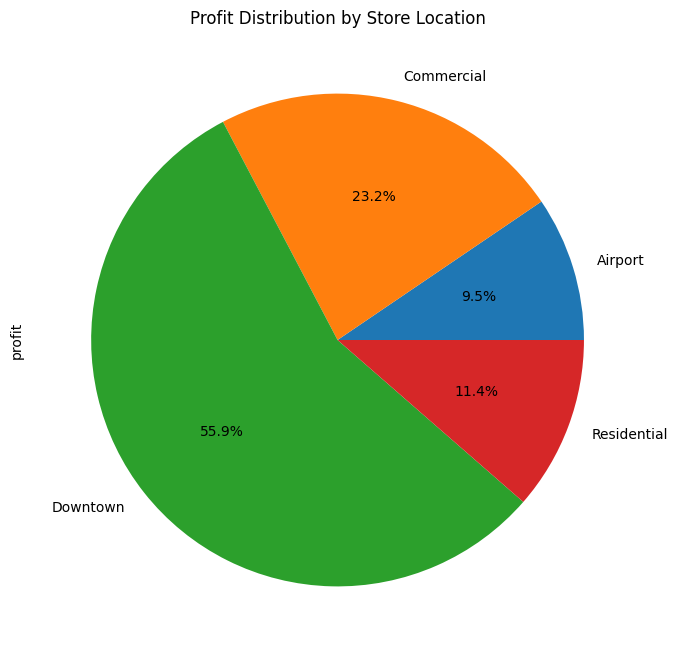

In [86]:
#Plot a pie chart to see the profit distribution by store location
profit_by_store_location = df.groupby('store_location')['profit'].sum().head(10)
plt.figure(figsize=(8, 8))
profit_by_store_location.plot(kind='pie', autopct='%1.1f%%', legend=False)
plt.title('Profit Distribution by Store Location')
plt.show()

In [37]:
#Summed up the profit by month and converted Month  to datetime in order ot be able to plot
df['month'] = df['date'].dt.to_period('M')
Monthly_profit = df.groupby('month')['profit'].sum().reset_index()
Monthly_profit['month'] = Monthly_profit['month'].dt.to_timestamp()

In [38]:
Monthly_sales = df.groupby('month')['revenue'].sum().reset_index()
Monthly_sales['month'] = Monthly_sales['month'].dt.to_timestamp()

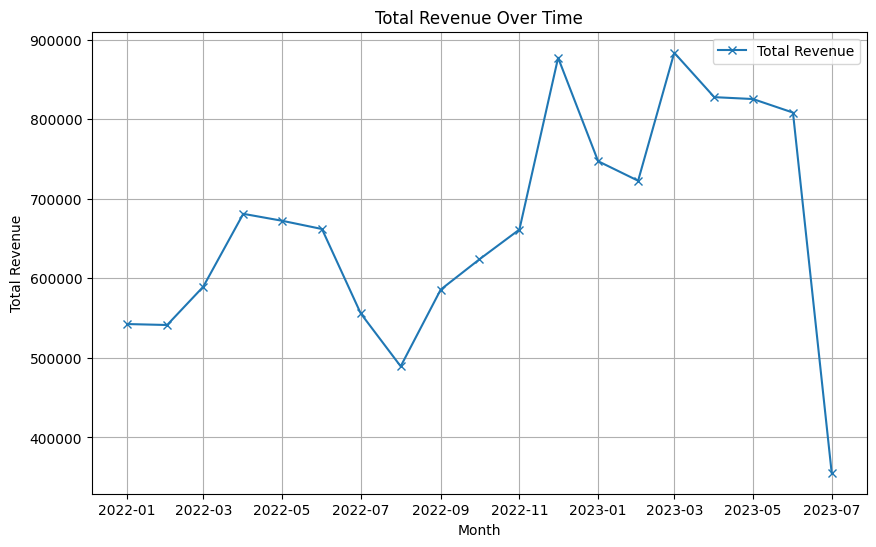

In [39]:
#Plot the linegraph
plt.figure(figsize=(10, 6))
plt.plot(Monthly_sales['month'], Monthly_sales['revenue'], marker='x', label='Total Revenue')
plt.title('Total Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(visible=True)
plt.legend()
plt.show()

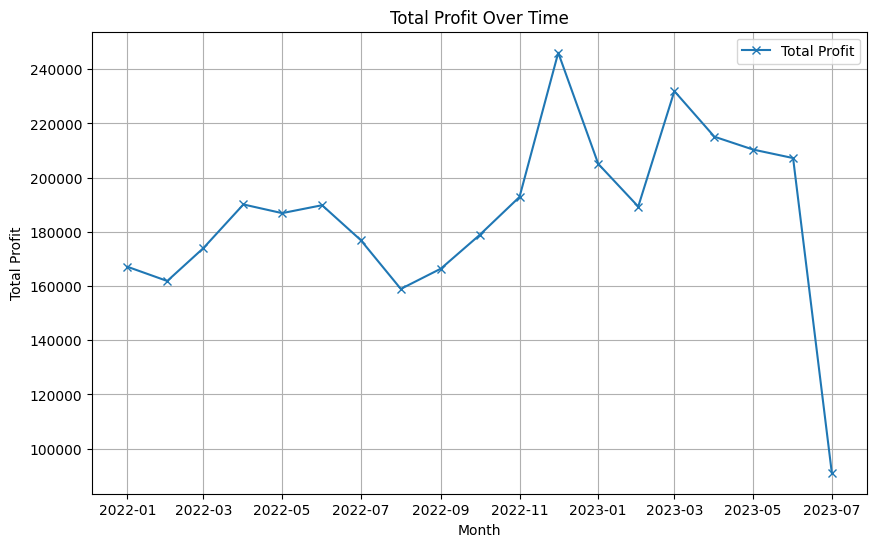

In [40]:
#Plot the linegraph
plt.figure(figsize=(10, 6))
plt.plot(Monthly_profit['month'], Monthly_profit['profit'], marker='x', label='Total Profit')
plt.title('Total Profit Over Time')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.grid(visible=True)
plt.legend()
plt.show()

#1. Analyse sales over time in order to identify the peak seasons in terms of profits.

In [41]:
Monthly_profit

,month,profit
0,2022-01-01,167126.0
1,2022-02-01,161861.0
2,2022-03-01,173992.0
3,2022-04-01,190099.0
4,2022-05-01,186894.0
5,2022-06-01,189815.0
6,2022-07-01,176922.0
7,2022-08-01,158931.0
8,2022-09-01,166397.0
9,2022-10-01,178799.0


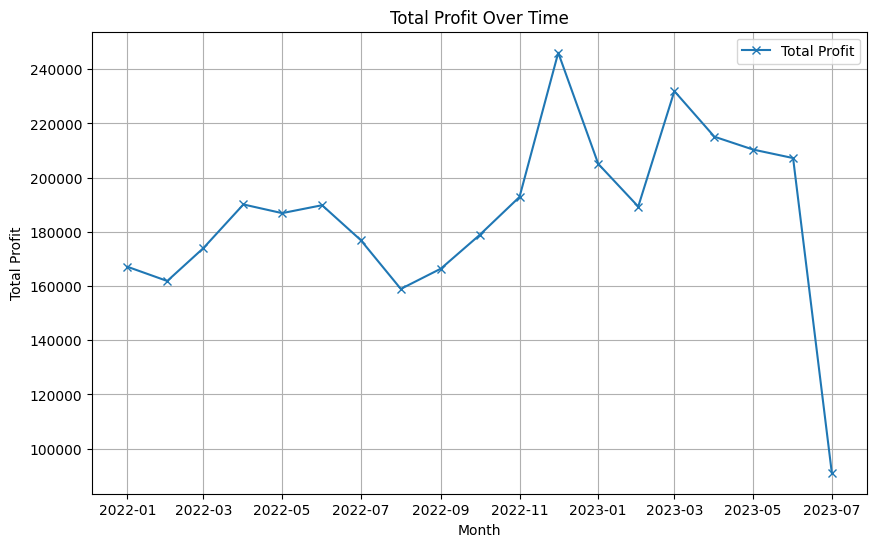

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(Monthly_profit['month'], Monthly_profit['profit'], marker='x', label='Total Profit')
plt.title('Total Profit Over Time')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.grid(visible=True)
plt.legend()
plt.show()

We notice that from January 2022 the profits do increase steadily before a drop that begins in June of 2022. In August 2022 onwards there is a steady increase all the way to the highest profit point in December of 2022 which would make sense as it is christmas and a lot of parents are buying toys for their kids. As expected after chrtismas there is a drop in profits and only starts picking up again in March and stays somewhat consistent till a drop in August which is similar to the August in 2022 meaning for both years August is the lowest month for profits.

#2.	Compare the profits across store locations to see which locations are most profitable#

In [43]:
profit_by_store_location

,profit
store_location,
Airport,336112.0
Commercial,821399.0
Downtown,1978349.0
Residential,403998.0


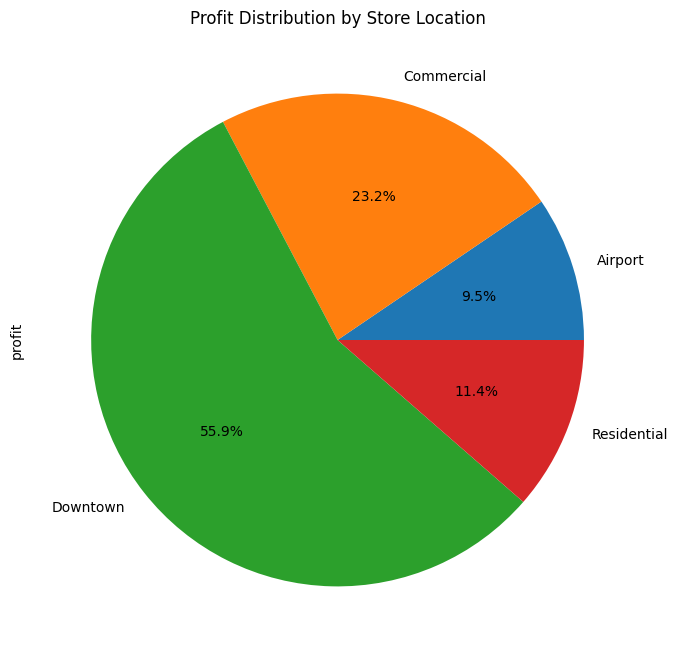

In [44]:
plt.figure(figsize=(8, 8))
profit_by_store_location.plot(kind='pie', autopct='%1.1f%%', legend=False)
plt.title('Profit Distribution by Store Location')
plt.show()

Downtown store locations seem to be the most profitable locations contributing to 56.8% of the profits from all locations. They are followed by Commerical with 23.1%, with Resednetial and airports being at the bottom two respectively.

# 3.	Identify the top 10 performing products by unit sales and revenue.

In [45]:
Highest_selling_product_units

,units
product_name,
Colorbuds,96708.0
PlayDoh Can,87490.0
Barrel O' Slime,79520.0
Deck Of Cards,74656.0
Splash Balls,53818.0
Action Figure,53746.0
Lego Bricks,52713.0
Magic Sand,48827.0
Rubik's Cube,41029.0


<ipython-input-46-9f848d99b926>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


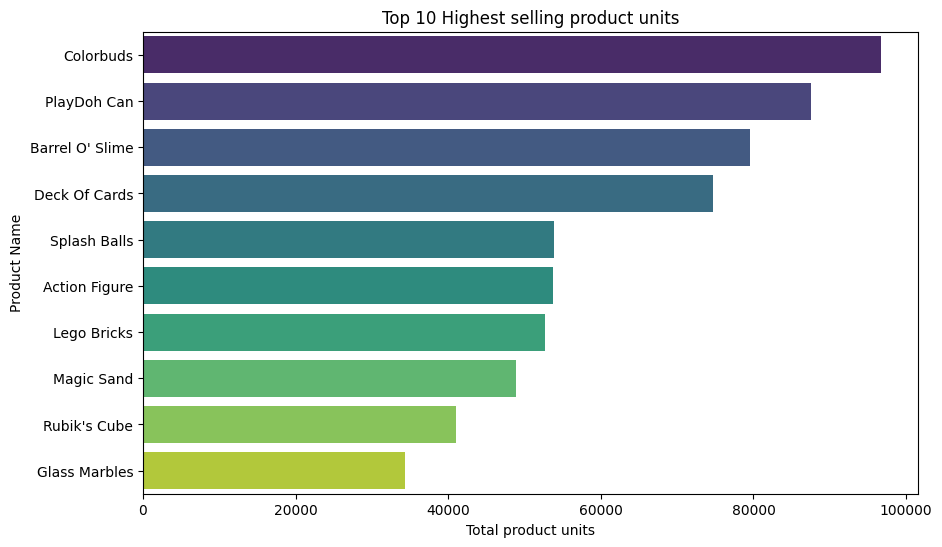

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=Highest_selling_product_units.values,
    y=Highest_selling_product_units.index,
    palette="viridis")

plt.title('Top 10 Highest selling product units')
plt.xlabel('Total product units')
plt.ylabel('Product Name')
plt.show()

The product that sells the most units is the Colorbuds followed by the Playdoh can and the Barel O' Slime. Due to price and unit sales though they are not the highest in revenue.

In [47]:
Highest_revenue_per_product

,revenue
product_name,
Lego Bricks,2107992.87
Colorbuds,1449652.92
Action Figure,859398.54
Rubik's Cube,820169.71
Magic Sand,780743.73
Deck Of Cards,521845.44
Splash Balls,483823.82
Dart Gun,455395.20
Nerf Gun,444357.71


<ipython-input-48-305ae4144298>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


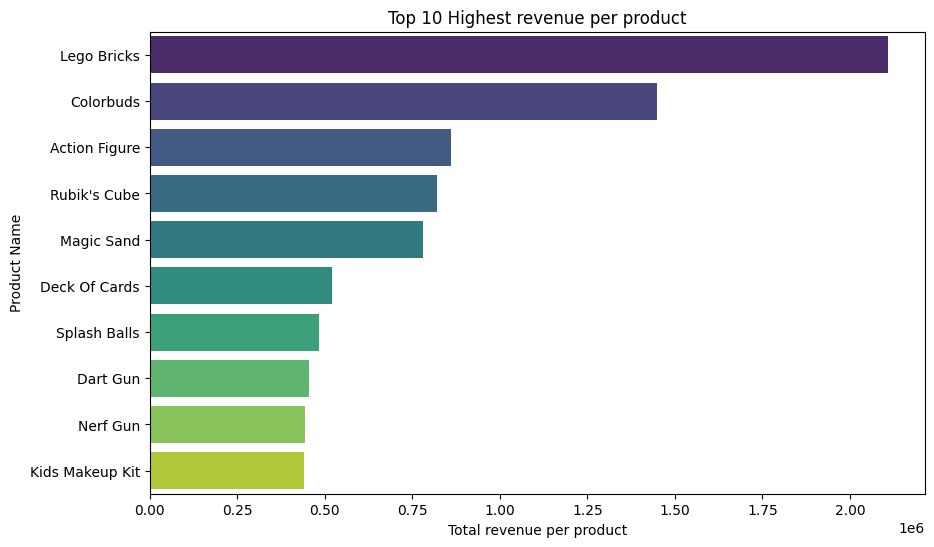

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=Highest_revenue_per_product.values,
    y=Highest_revenue_per_product.index,
    palette="viridis")

plt.title('Top 10 Highest revenue per product')
plt.xlabel('Total revenue per product')
plt.ylabel('Product Name')
plt.show()

In terms of Revenue Lego Bricks provides the highest revenue followed by Colorbuds and Magic Sand with Dart Gun rounding out the top 10 highest revenue producing products.

# 4.	Rank the top 10 best performing stores based on profits


In [49]:
Highest_profit_store


,profit
store_name,
Maven Toys Ciudad de Mexico 2,152779.0
Maven Toys Guadalajara 3,107326.0
Maven Toys Ciudad de Mexico 1,100190.0
Maven Toys Monterrey 2,92599.0
Maven Toys Guadalajara 4,92114.0
Maven Toys Toluca 1,92092.0
Maven Toys Mexicali 1,90492.0
Maven Toys Hermosillo 3,88848.0
Maven Toys Morelia 1,84246.0


<ipython-input-50-ed63fecda30c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


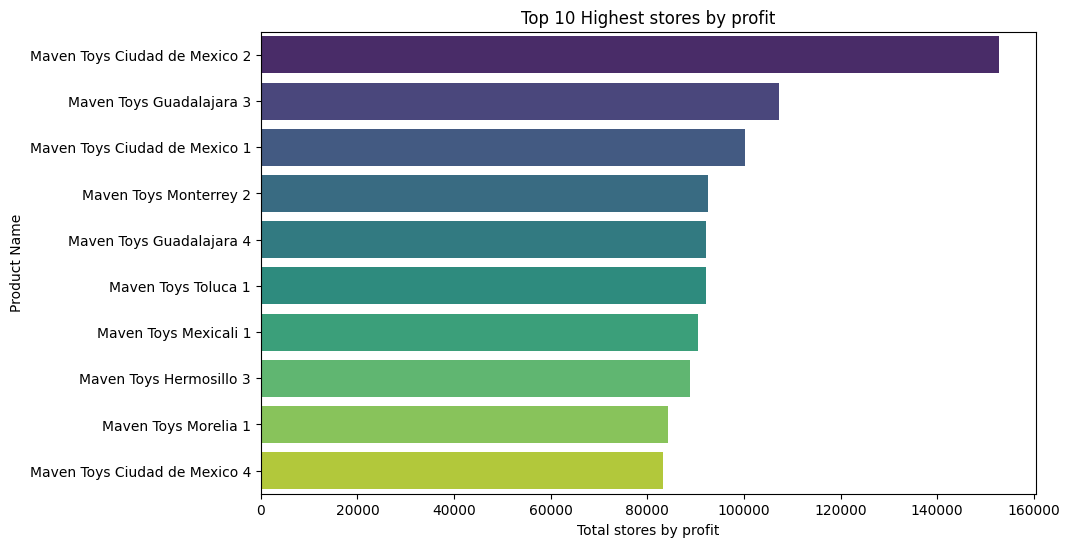

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=Highest_profit_store.values,
    y=Highest_profit_store.index,
    palette="viridis")

plt.title('Top 10 Highest stores by profit')
plt.xlabel('Total stores by profit')
plt.ylabel('Product Name')
plt.show()

In [51]:
df[df['store_name'] == 'Maven Toys Ciudad de Mexico 2'].head(1)

,sale_id,date,store_id,product_id,units,product_name,product_category,product_cost,product_price,store_name,Store_City,store_location,store_open_date,revenue,profit,profit_margin,store_age,month
173,174,2022-01-01,31.0,18.0,2.0,Lego Bricks,Toys,34.99,39.99,Maven Toys Ciudad de Mexico 2,Cuidad de Mexico,Airport,2012-05-04,79.98,10.0,0.125031,11,2022-01


Based on profits the best performing store is Maven Toys Ciudad de Mexico 2 which is interestingly based at an airport which was the location with the lowest profits. It is then followed by Maven Toys Guadalajara 3 and Maven Toys Ciudad de Mexico 1 respectively. To close out the top 10 is Maven Toys Ciudad de Maxico 3.

#5. Identify the product with the lowest profit margin, how can it be improved?

In [52]:
lowest_profit_margin = df.loc[df['profit_margin'].idxmin()]
lowest_profit_margin

,13
sale_id,14
date,2022-01-01 00:00:00
store_id,38.0
product_id,9.0
units,1.0
product_name,Dino Egg
product_category,Toys
product_cost,9.99
product_price,10.99
store_name,Maven Toys Chihuahua 2


In [53]:
units_sold_dino_egg = df.loc[df['product_name'] == 'Dino Egg', 'units'].sum()
units_sold_dino_egg

30420.0

In [54]:
df.groupby('product_name')['units'].sum().sort_values(ascending=False).head(15)

,units
product_name,
Colorbuds,96708.0
PlayDoh Can,87490.0
Barrel O' Slime,79520.0
Deck Of Cards,74656.0
Splash Balls,53818.0
Action Figure,53746.0
Lego Bricks,52713.0
Magic Sand,48827.0
Rubik's Cube,41029.0


We can tell that Dino Egg has the lowest profit margin of 0.090992. This could possibly be due to it's product price(Price it is sold for) being too low as the cost price for the product is 9.99 and the sell price is 10.99, meaning there is only a profit 1.0. When looking at units sold per product we can tell that Dino Eggs are the 11th most selling product with 38236 units sold meaning there is a demand for them so the solution would be increasing the selling price. A test could be done to increase the price to 12.99 and see if the demand stays the same.

#6.	Identify the most frequently sold product and what season that product sells the most.

In [55]:
def season(month):
    if month in [12, 1, 2]:
        return "Summer"
    elif month in [3, 4, 5]:
        return "Autumn"
    elif month in [6, 7, 8]:
        return "Winter"
    elif month in [9, 10, 11]:
        return "Spring"

In [56]:
most_sold_product = df.groupby('product_name')['units'].sum().idxmax()
most_sold_product

'Colorbuds'

In [57]:
product_sales = df[df['product_name'] == most_sold_product]
seasonal_sales = product_sales.groupby('month')['units'].sum().idxmax()
peak_season = season(seasonal_sales.month)
print(f"The peak sales season for Colorbuds is {peak_season} ({seasonal_sales})")

The peak sales season for Colorbuds is Summer (2022-01)


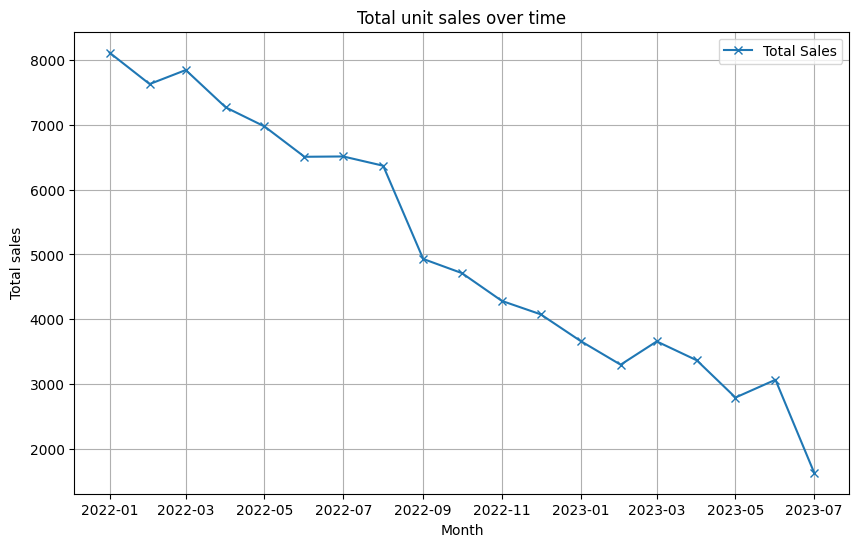

In [58]:
# Aggregate sales by month and convert month to datetime for plotting
seasonal_sales = product_sales.groupby(product_sales['date'].dt.to_period('M'))['units'].sum().reset_index()
seasonal_sales['date'] = seasonal_sales['date'].dt.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(seasonal_sales['date'], seasonal_sales['units'], marker='x', label='Total Sales')
plt.title('Total unit sales over time')
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.grid(visible=True)
plt.legend()
plt.show()

We can note that the highest selling product in terms of units sold is Colorbuds in summer with January being the month with the highest sales. Looking at the trajectory of the sales we could assume that 2021-12 sales were high too. They seems to be a decrease in sales over time which is a cause for concern and something that needs to be looked into as seen in the time series line graph.

#Dealing with outliers

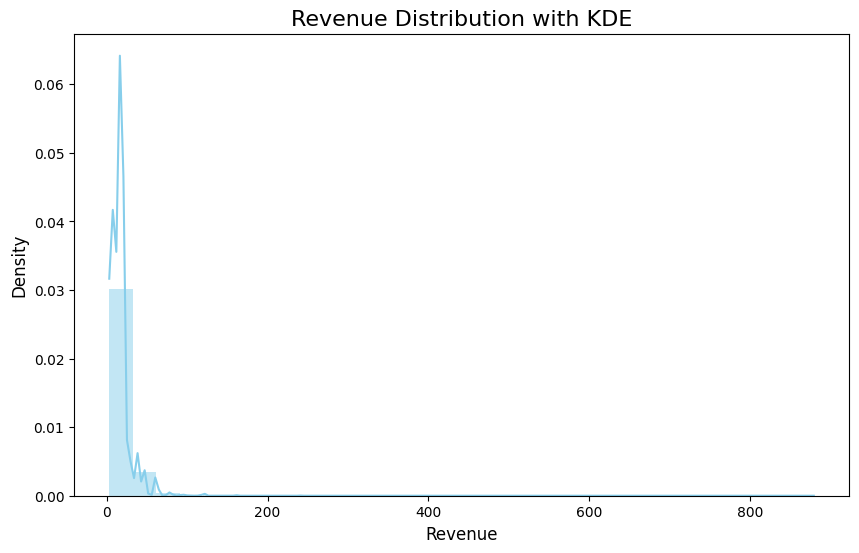

In [59]:
#Plotted the histogram and KDE in order to check if the data is normally distributed
plt.figure(figsize=(10, 6))
sns.histplot(df['revenue'], kde=True, bins=30, color="skyblue", stat="density", linewidth=0)
plt.title("Revenue Distribution with KDE", fontsize=16)
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

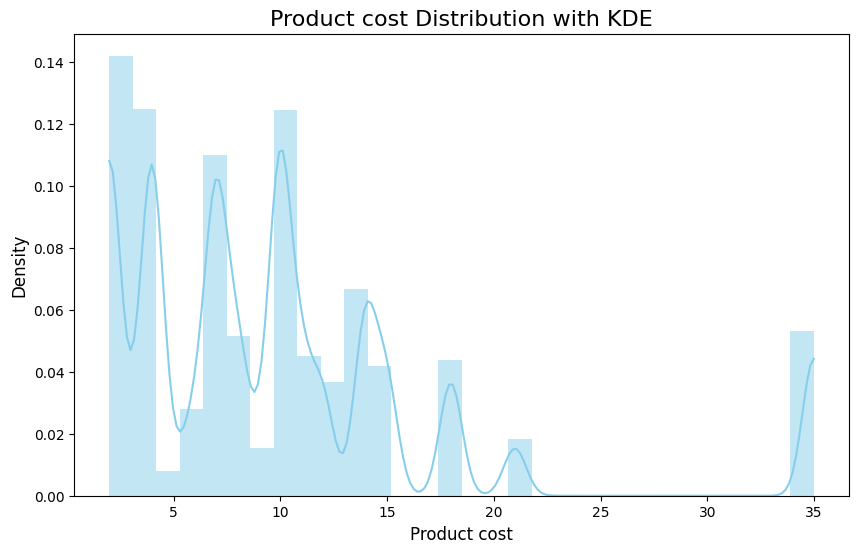

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(df['product_cost'], kde=True, bins=30, color="skyblue", stat="density", linewidth=0)
plt.title("Product cost Distribution with KDE", fontsize=16)
plt.xlabel("Product cost", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

We can tell from the above that our data is not normally distributed and is skewed so we will have to rely on the IQR to deal with the outliers

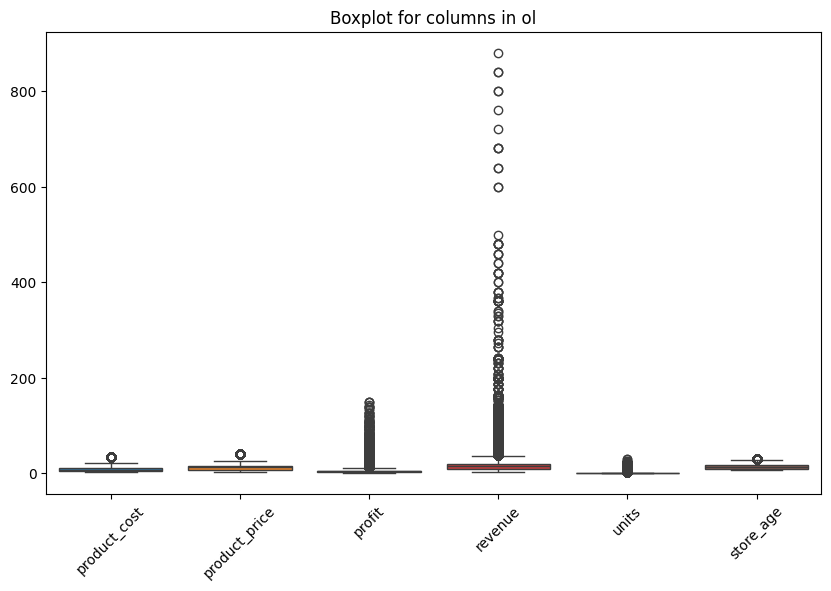

In [61]:
#Boxplot showing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[ol])
plt.title('Boxplot for columns in ol')
plt.xticks(rotation=45)
plt.show()

In [62]:
#Removing all outliers
df_no_outliers = df.copy()
for col in ol:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

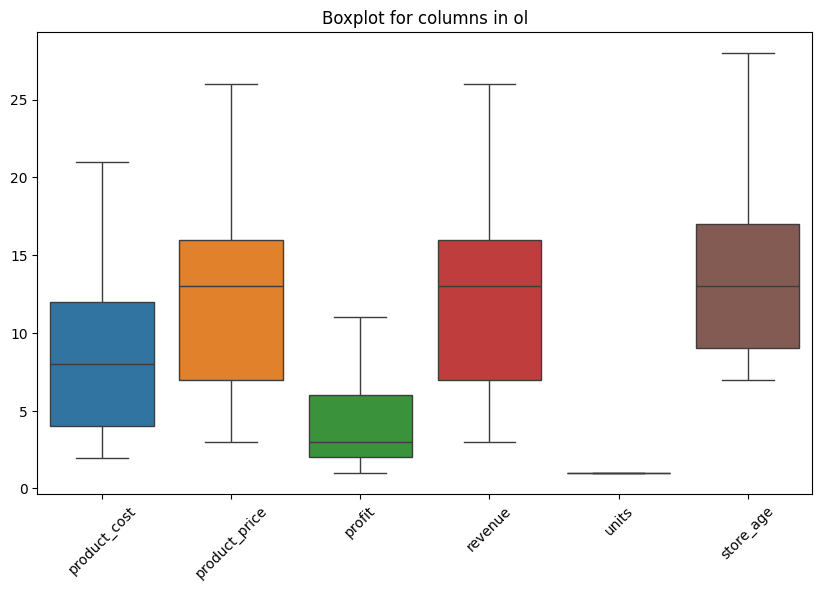

In [63]:
#Boxplot with outliers removed
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers[ol])
plt.title('Boxplot for columns in ol')
plt.xticks(rotation=45)
plt.show()

In [64]:
df[['product_cost', 'product_price', 'profit', 'revenue', 'units', 'store_age']].describe()

,product_cost,product_price,profit,revenue,units,store_age
count,719311.000000,719311.000000,719311.000000,719311.000000,719311.000000,719311.000000
mean,9.995386,13.830543,4.921179,17.590273,1.322073,13.616697
std,7.829303,8.673000,4.587419,15.830251,0.846303,5.337793
min,1.990000,2.990000,1.000000,2.990000,1.000000,7.000000
25%,3.990000,6.990000,2.000000,8.990000,1.000000,9.000000
50%,7.990000,12.990000,4.000000,14.990000,1.000000,13.000000
75%,11.990000,15.990000,6.000000,19.990000,1.000000,17.000000
max,34.990000,39.990000,150.000000,879.780000,30.000000,31.000000


In [65]:
df_no_outliers[['product_cost', 'product_price', 'profit', 'revenue', 'units', 'store_age']].describe()

,product_cost,product_price,profit,revenue,units,store_age
count,546548.000000,546548.000000,546548.000000,546548.000000,546548.0,546548.000000
mean,8.699504,12.499361,3.799857,12.499361,1.0,13.302930
std,4.912520,5.838774,2.401475,5.838774,0.0,4.802906
min,1.990000,2.990000,1.000000,2.990000,1.0,7.000000
25%,3.990000,6.990000,2.000000,6.990000,1.0,9.000000
50%,7.990000,12.990000,3.000000,12.990000,1.0,13.000000
75%,11.990000,15.990000,6.000000,15.990000,1.0,17.000000
max,20.990000,25.990000,11.000000,25.990000,1.0,28.000000


We do notice that once we deal with the outliers our means for columns drop down. Given that this is a sales dataset and that the outliers that are there are very important to get the full picture of the business dynamics. When performing a sanity check, we were able to confirm that none of the outliers appear to be an error or anomaly so it is best if we retain them. These values that are extreme reflect the real-world events, such as exceptional sales or large transactions which are important for the accuracy of the analysis and decision making.